Epoch 1/10
1250/1250 [==============================] - 348s 277ms/step - loss: 1.7665 - accuracy: 0.3763 - val_loss: 1.4597 - val_accuracy: 0.5031
Epoch 2/10
1250/1250 [==============================] - 348s 278ms/step - loss: 1.4604 - accuracy: 0.4931 - val_loss: 1.3502 - val_accuracy: 0.5347
Epoch 3/10
1250/1250 [==============================] - 359s 287ms/step - loss: 1.3709 - accuracy: 0.5247 - val_loss: 1.2951 - val_accuracy: 0.5532
Epoch 4/10
1250/1250 [==============================] - 1092s 874ms/step - loss: 1.3159 - accuracy: 0.5453 - val_loss: 1.2611 - val_accuracy: 0.5653
Epoch 5/10
1250/1250 [==============================] - 1617s 1s/step - loss: 1.2771 - accuracy: 0.5537 - val_loss: 1.2353 - val_accuracy: 0.5712
Epoch 6/10
1250/1250 [==============================] - 970s 776ms/step - loss: 1.2468 - accuracy: 0.5671 - val_loss: 1.2149 - val_accuracy: 0.5798
Epoch 7/10
1250/1250 [==============================] - 989s 791ms/step - loss: 1.2211 - accuracy: 0.5746 - val_l

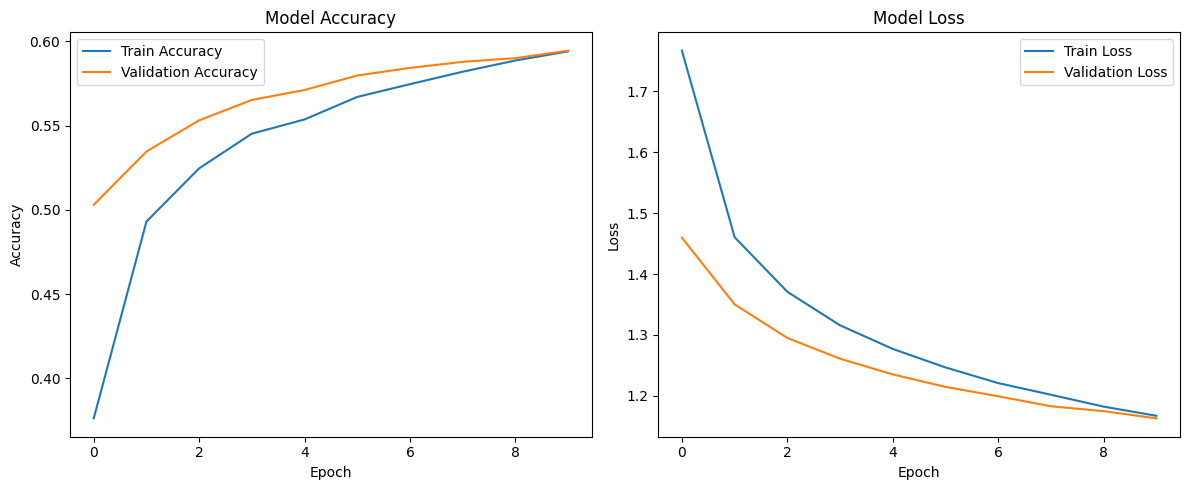

1/1 [==============================] - 0s 480ms/step


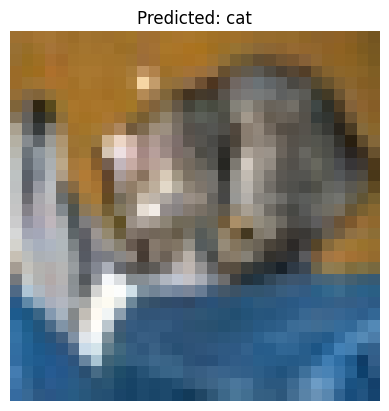

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0


vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


for layer in vgg_base.layers:
    layer.trainable = False


model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Optional: Visualize the model architecture
# plot_model(model, to_file='cnn.png', show_shapes=True, show_layer_names=True, dpi=300)
# plt.figure(figsize=(20, 20))
# img = plt.imread('cnn.png')
# plt.imshow(img)
# plt.axis('off')
# plt.show()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

sample_image = x_test[0]
sample_input = np.expand_dims(sample_image, axis=0) 
prediction = model.predict(sample_input)
predicted_class = class_names[np.argmax(prediction)]

plt.imshow(sample_image)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()